### Bağlantı ve kurulum



In [255]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
!pip install opencv-python
!pip install tensorflow
!pip install flatbuffers
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.4
    Uninstalling flatbuffers-23.1.4:
      Successfully uninstalled flatbuffers-23.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.9.0.1 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uni

In [257]:
import cv2
import pandas as pd
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

### Tespit İşlemleri

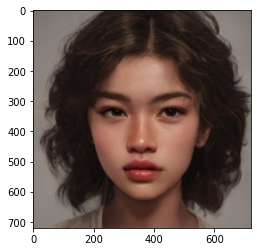

In [270]:
#img_path = "/content/drive/MyDrive/Yapay_Zeka/Face_transfer.py/mei.jpg"
img_path = "/content/drive/MyDrive/Yapay_Zeka/Face_transfer.py/h.jpg"

img = cv2.imread(img_path)
height, width, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [271]:
mp_mesh = mp.solutions.face_mesh
mesh = mp_mesh.FaceMesh()
result = mesh.process(img)

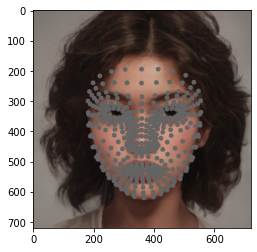

In [272]:
img = cv2.imread(img_path)
height, width, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mp_mesh = mp.solutions.face_mesh
mesh = mp_mesh.FaceMesh()
result = mesh.process(img)

count = 0
values = []
other_values = []

for facial_landmarks in result.multi_face_landmarks:
  for i in range(0,468):
    loc = facial_landmarks.landmark[i]
    x = int(loc.x * width)
    y = int(loc.y * height)

    if i in [10,109,67,103,54,21,162,127,234,93,132,215,58,172,136,150,149,176,148,152,377,400,378,379,365,397,288,435,401,366,454,264,389,251,284,332,297,338,6]:
  
        if i in [6,10,234,152,454]:
          values.append((x,y))
          cv2.circle( img, (x,y), 8, (100,100,100),-1)

        other_values.append((x,y))
    cv2.circle( img, (x,y), 8, (100,100,100),-1)
          
      

plt.imshow(img)



In [273]:
num1 = [10,109,67,103,54,21,162,127,234,93,132,215,58,172,136,150,149,176,148,152,377,400,378,379,365,397,288,435,401,366,454,264,389,251,284,332,297,338,6]
num2 = sorted(num1)
print(num2)

[6, 10, 21, 54, 58, 67, 93, 103, 109, 127, 132, 136, 148, 149, 150, 152, 162, 172, 176, 215, 234, 251, 264, 284, 288, 297, 332, 338, 365, 366, 377, 378, 379, 389, 397, 400, 401, 435, 454]


### spiral

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()

### Find Comon Colors

In [274]:
from sklearn.cluster import KMeans

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


clt = KMeans(n_clusters=6)
clt.fit(img.reshape(-1,3))
clt.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [275]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [276]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

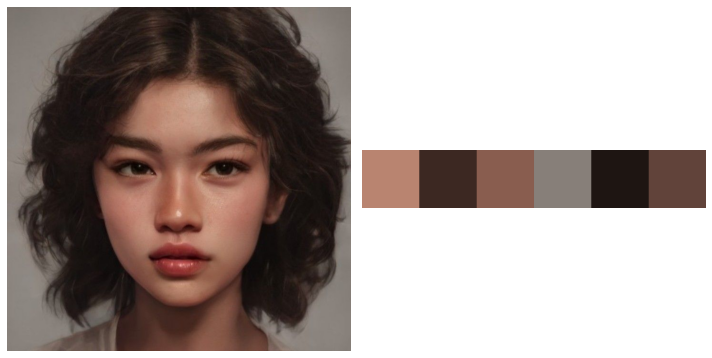

In [277]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))



In [278]:
colors = []

for idx, centers in enumerate(clt_1.cluster_centers_): 
  colors.append(centers) 


In [279]:
values

[(359, 358), (358, 195), (366, 620), (187, 374), (550, 374)]

In [280]:
from math import *

dists = []
a = sqrt( pow(values[0][0] - values[3][0], 2) + pow(values[0][1] - values[3][1], 2))
dists.append(a)
b = sqrt( pow(values[0][0] - values[4][0], 2) + pow(values[0][1] - values[4][1], 2))
dists.append(b)
c = sqrt( pow(values[0][0] - values[1][0], 2) + pow(values[0][1] - values[1][1], 2))
dists.append(c)
d = sqrt( pow(values[0][0] - values[2][0], 2) + pow(values[0][1] - values[2][1], 2))
dists.append(d)

x_max = max(a,b)
dists.append(x_max)
x_min = min(a,b)
dists.append(x_min)

y_max = max(c,d)
dists.append(y_max)
y_min = min(c,d)
dists.append(y_min)
print(dists)


[172.74258305351347, 191.66898549321954, 163.00306745579974, 262.0934947685654, 191.66898549321954, 172.74258305351347, 262.0934947685654, 163.00306745579974]


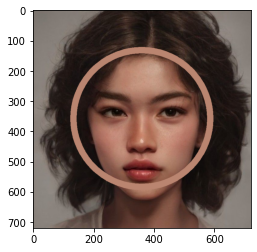

In [281]:
img = cv2.imread(img_path)
height, width, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.circle(img, values[0], int((dists[4] + dists[6] )/ 2), colors[0], 20)
plt.imshow(img)

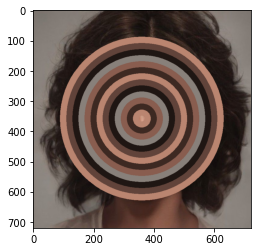

In [282]:
img = cv2.imread(img_path)
height, width, _ = img.shape
img_circle = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flag = True
i=0
radius = 20
while flag:
  i = i % len(colors)
  cv2.circle(img_circle, values[0], radius, colors[i], 20)
  i += 1
  radius += 20

  if radius >= int((dists[4] + dists[6] )/ 2 + 40 ):
    plt.imshow(img_circle)
    flag = False

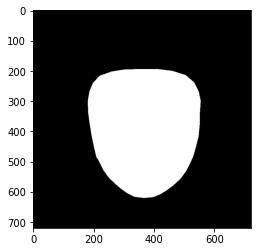

In [283]:


img = cv2.imread(img_path)
height, width, _ = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

other_indexes = [(2,3),(16,17),(10,11),(14,15),(6,7),(4,5),(32,33),(18,19),(40,41),(12,13),(20,21),(38,39),(8,9),(34,35),(22,23),(28,29),(26,27),(36,37),(24,25),(30,31),(60,61),(70,71),(62,63),(64,65),(56,57),(68,69),(48,49),(74,75),(72,73),(58,59),(76,77),(44,45),(66,67),(42,43),(46,47),(52,53),(50,51),(54,55)]
other_reorganized = np.take(other_values,other_indexes)

mask = np.zeros_like(img)
mask = cv2.fillPoly(mask,  np.int32([other_reorganized]), (255,255,255))
plt.imshow(mask)

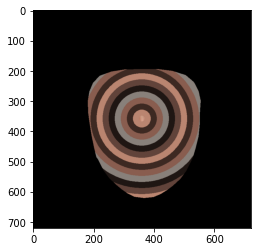

In [284]:
image_with_circles =cv2.bitwise_and(img_circle,mask)
plt.imshow(image_with_circles)

In [285]:
def create_circled(img, points, scale=3):
  mask = np.zeros_like(img)
  mask = cv2.fillPoly(mask, [points], (255,255,255))
  img = cv2.bitwise_and(img, mask)
  
  bbox = cv2.boundingRect(points)
  x,y,w,h = bbox
  imgCrop = img[y:y+h, x:x+w]
  imgCrop = cv2.resize(imgCrop, (0,0), None, scale, scale)
  return imgCrop



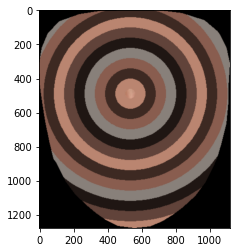

In [286]:
img_circled_mask = create_circled(img_circle,other_reorganized )
plt.imshow(img_circled_mask)

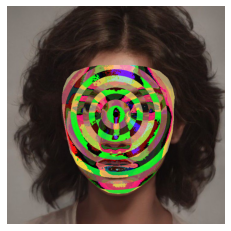

In [287]:


image_with_mask = cv2.bitwise_xor(image_with_circles, img)
plt.axis('off')
plt.imshow(image_with_mask)

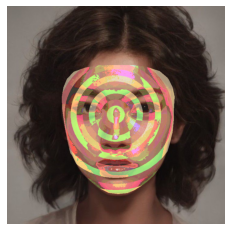

In [288]:
image_with_mask = cv2.bitwise_or(image_with_circles, img)
plt.axis('off')
plt.imshow(image_with_mask)